# 04 - Applied ML

# Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

# Constants definition

In [16]:
DATA_PATH = "./data"

 # Question 1: Propensity score matching

In [19]:
df = pd.read_csv("{}/lalonde.csv".format(DATA_PATH))
df.set_index('id', drop=True, inplace=True)

In [43]:
df['outcome'] = np.where( (x['re78'] - x['re75']) > 0 , 'green', 'red')

KeyError: 're78'

### 1. a naive approach

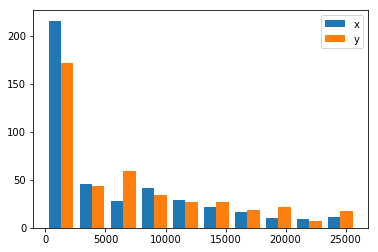

In [31]:
x = df[df["treat"] == 0]['re74']
y = df[df["treat"] == 0]['re78']

plt.hist( (x, y), label=('x', 'y'))
plt.legend(loc='upper right')
plt.show()

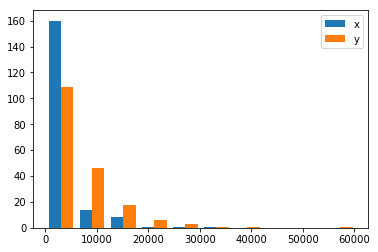

In [32]:
x = df[df["treat"] == 1]['re74']
y = df[df["treat"] == 1]['re78']

plt.hist( (x, y), label=('x', 'y'))
plt.legend(loc='upper right')
plt.show()

### 3. A propensity score model

In [ ]:
features = ['treat', 'age', 'educ', 'black', 'hispan', 'married', 'nodegree']

In [ ]:
# The features vector
X = pd.get_dummies(df[features])
X.head()

In [ ]:
precision = cross_val_score(logistic, X, y, cv=10, scoring="precision")

 # Question 2: Applied ML

In [20]:
newsgroups_train = fetch_20newsgroups(data_home='{}/'.format(DATA_PATH) ,subset='train')

In [48]:
print(newsgroups_train.data[1], end="\n\n")
print(newsgroups_train.data[2])

From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>


From: twillis@ec.ecn.purdue.edu (Thomas E Willis)
Subject: PB questions...
Organization: Purdue University Engineering Computer Network
Dist

In [4]:
type(newsgroups_train)

sklearn.datasets.base.Bunch

In [35]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(11314, 130107)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier()

In [40]:
newsgroups_test = fetch_20newsgroups(data_home='{}/'.format(DATA_PATH) ,subset='test')
vectors_test = vectorizer.transform(newsgroups_train.data)

clf.fit(vectors, newsgroups_train.target)
pred = clf.predict(vectors_test)

metrics.f1_score(newsgroups_test.target, pred, average='macro')

ValueError: Found input variables with inconsistent numbers of samples: [7532, 11314]